In [1]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk


In [2]:
df=pd.read_csv("spam.csv")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
#drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.rename(columns={'v1':'Spam/Ham','v2':'Text'},inplace=True)
df.head()

,Spam/Ham,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
encoder=LabelEncoder()
df['Spam/Ham']=encoder.fit_transform(df['Spam/Ham'])
df.head()

,Spam/Ham,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
#Check missing values
df.isnull().sum()

Spam/Ham    0
Text        0
dtype: int64

In [9]:
#check duplicate values
df.duplicated().sum()

403

In [10]:
#remove duplicate values
df=df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [11]:
df.shape

(5169, 2)

In [12]:
#Performing EDA
df.head()

,Spam/Ham,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df['Spam/Ham'].value_counts()

0    4516
1     653
Name: Spam/Ham, dtype: int64

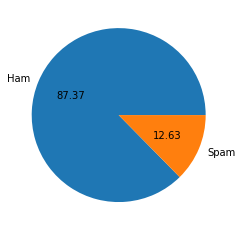

In [14]:
plt.pie(df['Spam/Ham'].value_counts(), labels=['Ham','Spam'],autopct="%0.2f")
plt.show()

In [15]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arbab\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
df['Text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    160
5568     37
5569     57
5570    125
5571     26
Name: Text, Length: 5169, dtype: int64

In [17]:
df['num_char']=df['Text'].apply(len)
df.head()

,Spam/Ham,Text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [18]:
# Break Text into word by word basis
df['Text'].apply(lambda a:nltk.word_tokenize(a))


0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, �_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: Text, Length: 5169, dtype: object

In [19]:
df['Text'].apply(lambda a:len(nltk.word_tokenize(a)))


0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: Text, Length: 5169, dtype: int64

In [20]:
df['num_words'] = df['Text'].apply(lambda a:len(nltk.word_tokenize(a)))
df.head()

,Spam/Ham,Text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [21]:
df['num_sentences'] = df['Text'].apply(lambda a:len(nltk.sent_tokenize(a)))
df.head()

,Spam/Ham,Text,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [22]:
df[['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.923776,18.456375,1.962275
std,58.174846,13.323322,1.433892
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [23]:
#For Spam messages
df[df['Spam/Ham'] == 1][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.977029
std,30.014336,7.011513,1.493676
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [24]:
#For Ham messages
df[df['Spam/Ham'] == 0][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.123339,1.815545
std,56.356802,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


<AxesSubplot:xlabel='num_char', ylabel='Count'>

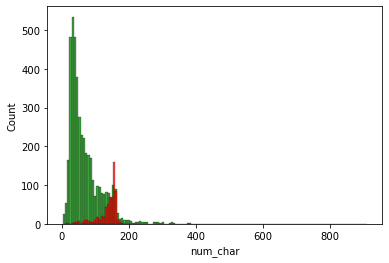

In [25]:
import seaborn as sns
sns.histplot(df[df['Spam/Ham'] == 0]['num_char'],color='green')
sns.histplot(df[df['Spam/Ham'] == 1]['num_char'],color='red')

In [26]:
plt.figure(figsize=(10,5))

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<AxesSubplot:xlabel='num_char', ylabel='Count'>

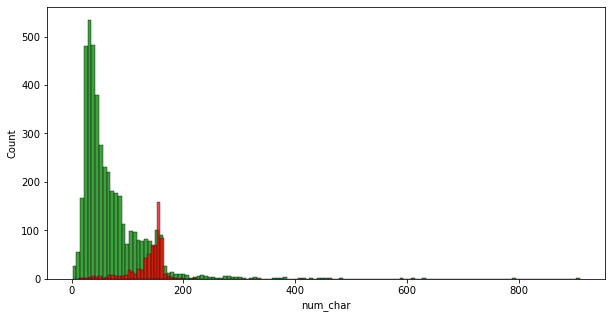

In [27]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['Spam/Ham'] == 0]['num_char'],color='green')
sns.histplot(df[df['Spam/Ham'] == 1]['num_char'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

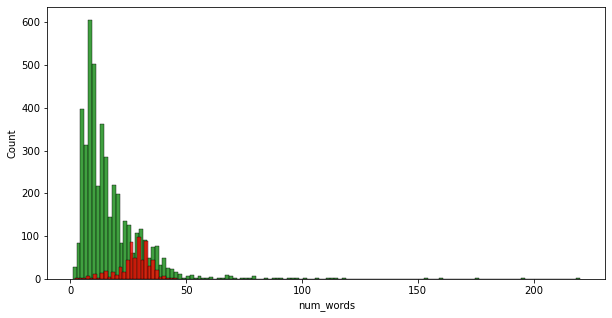

In [28]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['Spam/Ham'] == 0]['num_words'],color='green')
sns.histplot(df[df['Spam/Ham'] == 1]['num_words'],color='red')

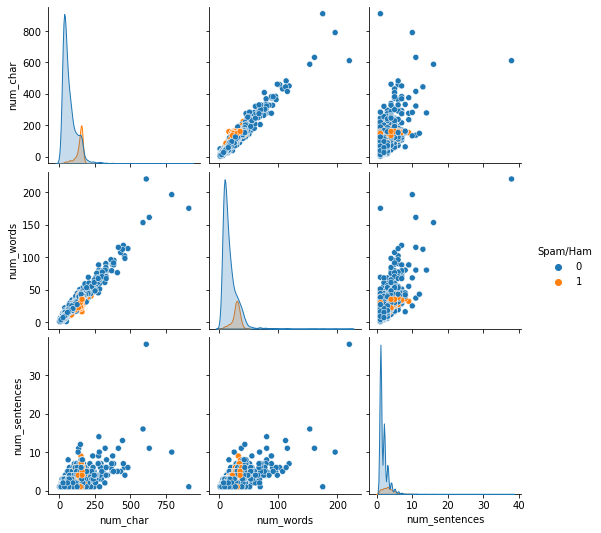

In [29]:
sns.pairplot(df,hue='Spam/Ham')

In [30]:
#corrolation 
df.corr()

,Spam/Ham,num_char,num_words,num_sentences
Spam/Ham,1.000000,0.382785,0.263143,0.269132
num_char,0.382785,1.000000,0.966087,0.626197
num_words,0.263143,0.966087,1.000000,0.680924
num_sentences,0.269132,0.626197,0.680924,1.000000


<AxesSubplot:>

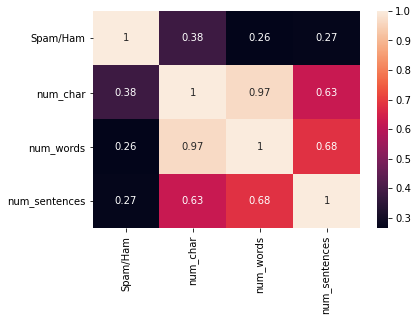

In [31]:
sns.heatmap(df.corr(),annot=True)

In [32]:
#Text preprocessing
def text_transformation(Text):
    Text=Text.lower()
    return Text
text_transformation('Is that seriously how you spell his name?')



'is that seriously how you spell his name?'

In [33]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [34]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [35]:
def text_transformation(Text):
    Text = Text.lower()
    Text = nltk.word_tokenize(Text)
    
    y = []
    for i in Text:
        if i.isalnum():
            y.append(i)
    
    Text = y[:]
    y.clear()
    
    for i in Text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)        
    return y
text_transformation('Did you like my code?')

['like', 'code']

In [36]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('swimming')

'swim'

In [37]:
def text_transformation(Text):
    Text = Text.lower()
    Text = nltk.word_tokenize(Text)
    
    y = []
    for i in Text:
        if i.isalnum():
            y.append(i)
    
    Text = y[:]
    y.clear()
    
    for i in Text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    Text = y[:]
    y.clear()
    
    for i in Text:
        y.append(ps.stem(i))         
    return " ".join(y)
text_transformation('Ok lar... Joking wif u oni...')

'ok lar joke wif u oni'

In [38]:
df['Text'][1]

'Ok lar... Joking wif u oni...'

In [39]:
df['Text'].apply(text_transformation)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: Text, Length: 5169, dtype: object

In [40]:
df['text_transformation']=df['Text'].apply(text_transformation)
df.head()

,Spam/Ham,Text,num_char,num_words,num_sentences,text_transformation
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [41]:
!pip install wordcloud

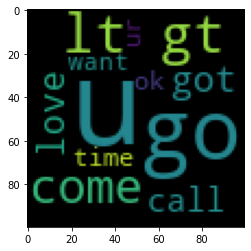

In [42]:
from wordcloud import WordCloud
wc = WordCloud(width=100,height=100,min_font_size=10,background_color='black')
ham_wc=wc.generate(df[df['Spam/Ham']==0]['text_transformation'].str.cat(sep=" "))
plt.imshow(ham_wc)

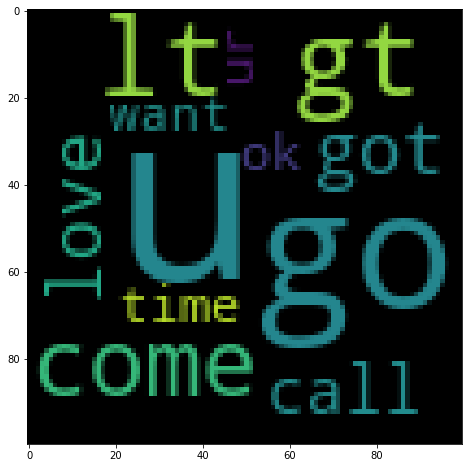

In [43]:
plt.figure(figsize=(20,8))
plt.imshow(ham_wc)

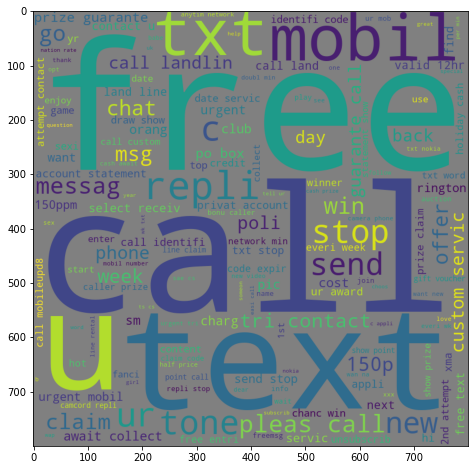

In [44]:
wc = WordCloud(width=800,height=800,min_font_size=10,background_color='grey')
spam_wc=wc.generate(df[df['Spam/Ham']==1]['text_transformation'].str.cat(sep=" "))
plt.figure(figsize=(15,8))
plt.imshow(spam_wc)


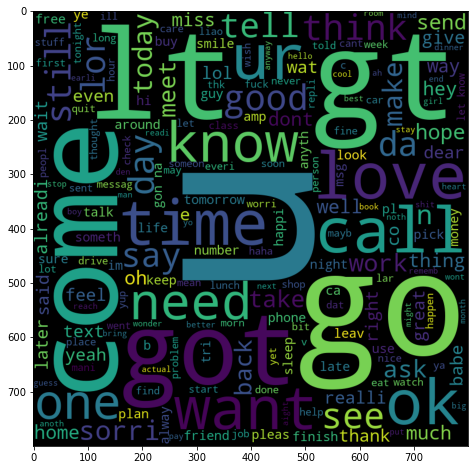

In [45]:
wc = WordCloud(width=800,height=800,min_font_size=10,background_color='black')
ham_wc=wc.generate(df[df['Spam/Ham']==0]['text_transformation'].str.cat(sep=" "))
plt.figure(figsize=(15,8))
plt.imshow(ham_wc)

In [46]:
#Most used spam words in text
for message in df[df['Spam/Ham']==1]['text_transformation'].tolist():
    print(message)

free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18
freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv
winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour
mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030
six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info
urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18
xxxmobilemovieclub use credit click wap link next txt messag click http
england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq
thank subscript rington uk mobil charg pleas confirm repli ye repli charg
07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow
sm ac sptv new jersey devil detroit red wi

In [47]:
spam_corpus=[]
for message in df[df['Spam/Ham']==1]['text_transformation'].tolist():
    for word in message.split():
        spam_corpus.append(word)
len(spam_corpus)

9941

In [48]:
from collections import Counter
Counter(spam_corpus)

Counter({'free': 191,
         'entri': 21,
         '2': 155,
         'wkli': 9,
         'comp': 8,
         'win': 48,
         'fa': 2,
         'cup': 3,
         'final': 14,
         'tkt': 2,
         '21st': 1,
         'may': 6,
         'text': 122,
         '87121': 2,
         'receiv': 31,
         'question': 9,
         'std': 6,
         'txt': 141,
         'rate': 26,
         'c': 45,
         'appli': 24,
         '08452810075over18': 1,
         'freemsg': 14,
         'hey': 5,
         'darl': 2,
         '3': 20,
         'week': 49,
         'word': 21,
         'back': 20,
         'like': 12,
         'fun': 8,
         'still': 5,
         'tb': 1,
         'ok': 5,
         'xxx': 10,
         'chg': 2,
         'send': 60,
         'rcv': 2,
         'winner': 13,
         'valu': 8,
         'network': 26,
         'custom': 42,
         'select': 26,
         'receivea': 1,
         'prize': 82,
         'reward': 9,
         'claim': 98,
         'cal

In [49]:
Counter(spam_corpus).most_common(10)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103)]

C:\Users\arbab\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


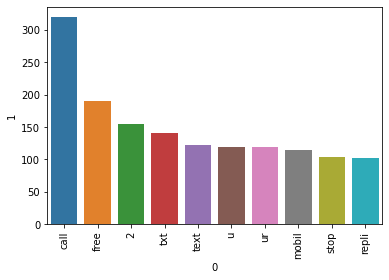

In [50]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(10))[0],pd.DataFrame(Counter(spam_corpus).most_common(10))[1])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\arbab\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


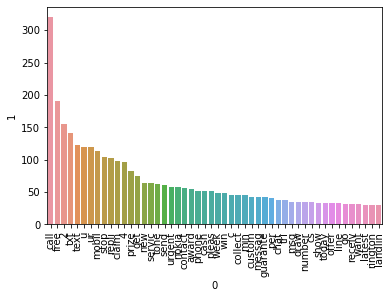

In [51]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(50))[0],pd.DataFrame(Counter(spam_corpus).most_common(50))[1])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\arbab\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


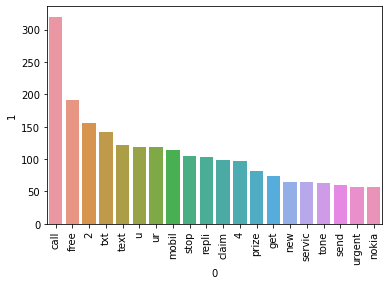

In [52]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(20))[0],pd.DataFrame(Counter(spam_corpus).most_common(20))[1])
plt.xticks(rotation='vertical')
plt.show()

In [53]:
ham_corpus = []
for message in df[df['Spam/Ham'] == 0]['text_transformation'].tolist():
    for word in message.split():
        ham_corpus.append(word)
len(ham_corpus)

35303

C:\Users\arbab\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


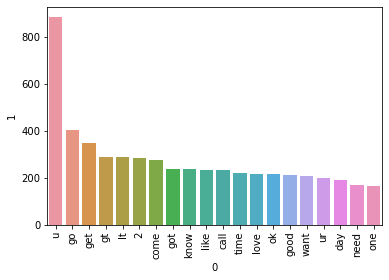

In [54]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(20))[0],pd.DataFrame(Counter(ham_corpus).most_common(20))[1])
plt.xticks(rotation='vertical')
plt.show()

In [55]:
#Building Model using naive bayes algorithm
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x = cv.fit_transform(df['text_transformation']).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [56]:
x.shape

(5169, 6677)

In [57]:
y=df['Spam/Ham'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [58]:
y.shape

(5169,)

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [60]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [61]:
y_pred=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.8781431334622823
[[790 106]
 [ 20 118]]
0.5267857142857143


In [62]:
mnb.fit(x_train,y_train)
y_pred_a=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred_a))
print(confusion_matrix(y_test,y_pred_a))
print(precision_score(y_test,y_pred_a))

0.965183752417795
[[872  24]
 [ 12 126]]
0.84


In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [64]:
x = np.hstack((x,df['num_char'].values.reshape(-1,1)))
x

array([[  0.,   0.,   0., ...,   0.,   0., 111.],
       [  0.,   0.,   0., ...,   0.,   0.,  29.],
       [  0.,   0.,   0., ...,   0.,   0., 155.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,  57.],
       [  0.,   0.,   0., ...,   0.,   0., 125.],
       [  0.,   0.,   0., ...,   0.,   0.,  26.]])

In [65]:
#Tfidf-->MNB
from sklearn.feature_extraction.text import TfidfVectorizer
tfidv= TfidfVectorizer()
x = tfidv.fit_transform(df['text_transformation']).toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [66]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [67]:
tfidf = TfidfVectorizer(max_features=3000)
x = tfidv.fit_transform(df['text_transformation']).toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [68]:
x.shape

(5169, 6677)

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [70]:
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.874274661508704
[[791 105]
 [ 25 113]]
0.518348623853211


In [71]:
mnb.fit(x_train,y_train)
y_pred_a=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred_a))
print(confusion_matrix(y_test,y_pred_a))
print(precision_score(y_test,y_pred_a))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [72]:
!pip install xgboost

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [74]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [75]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [76]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9729206963249516, 0.9741379310344828)

In [77]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy: ",current_accuracy)
    print("Precision: ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy:  0.9729206963249516
Precision:  0.9741379310344828
For  KN
Accuracy:  0.9003868471953579
Precision:  1.0
For  NB
Accuracy:  0.9593810444874274
Precision:  1.0
For  DT
Accuracy:  0.9342359767891683
Precision:  0.8301886792452831
For  LR
Accuracy:  0.9516441005802708
Precision:  0.94
For  RF
Accuracy:  0.9700193423597679
Precision:  0.9908256880733946
For  AdaBoost
Accuracy:  0.9622823984526112
Precision:  0.9541284403669725
For  BgC
Accuracy:  0.9574468085106383
Precision:  0.8615384615384616
For  ETC
Accuracy:  0.9777562862669246
Precision:  0.9914529914529915
For  GBDT
Accuracy:  0.9516441005802708
Precision:  0.9313725490196079


C:\Users\arbab\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:49:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
For  xgb
Accuracy:  0.971953578336557
Precision:  0.9504132231404959


In [78]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
8,ETC,0.977756,0.991453
5,RF,0.970019,0.990826
0,SVC,0.972921,0.974138
6,AdaBoost,0.962282,0.954128
10,xgb,0.971954,0.950413
4,LR,0.951644,0.940000
9,GBDT,0.951644,0.931373
7,BgC,0.957447,0.861538


In [79]:
performance_df_a = pd.melt(performance_df, id_vars = "Algorithm")
performance_df_a

,Algorithm,variable,value
0,KN,Accuracy,0.900387
1,NB,Accuracy,0.959381
2,ETC,Accuracy,0.977756
3,RF,Accuracy,0.970019
4,SVC,Accuracy,0.972921
5,AdaBoost,Accuracy,0.962282
6,xgb,Accuracy,0.971954
7,LR,Accuracy,0.951644
8,GBDT,Accuracy,0.951644
9,BgC,Accuracy,0.957447


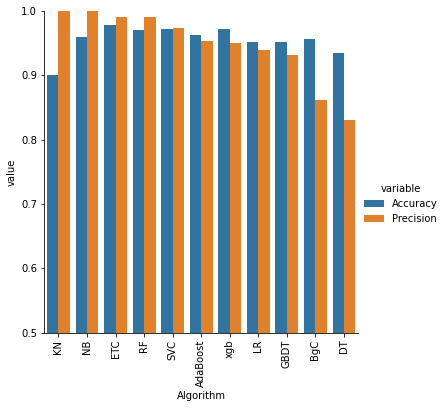

In [80]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df_a, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [81]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [82]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [83]:
y_pred = voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9777562862669246
Precision 0.9914529914529915


In [84]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [85]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9612403100775194


In [86]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))